# 誘導式機構專用演算法展示

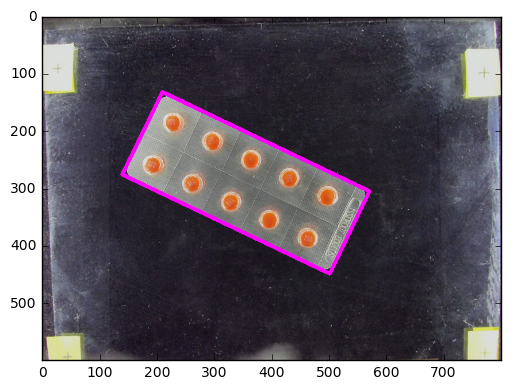

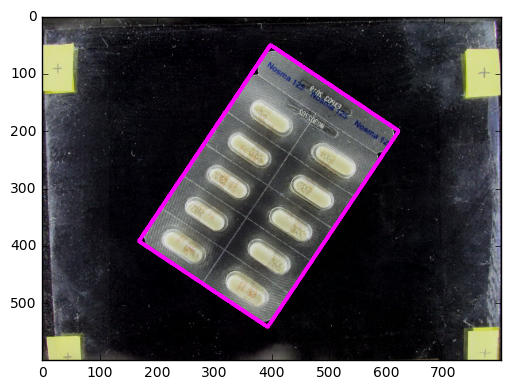

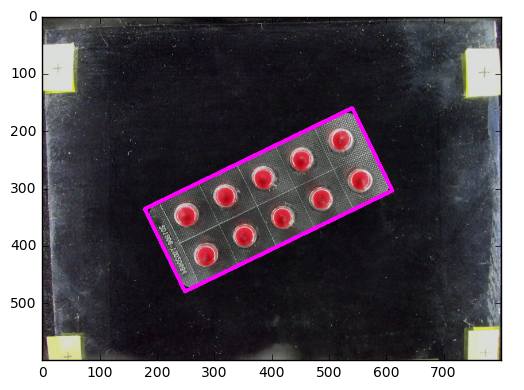

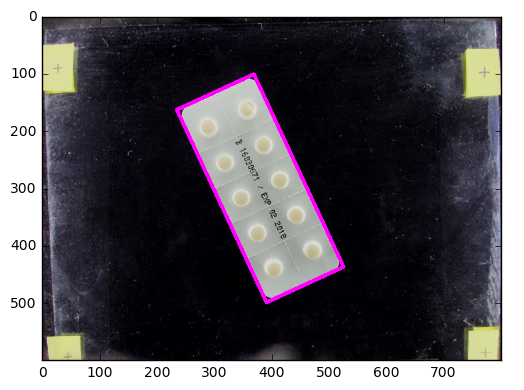

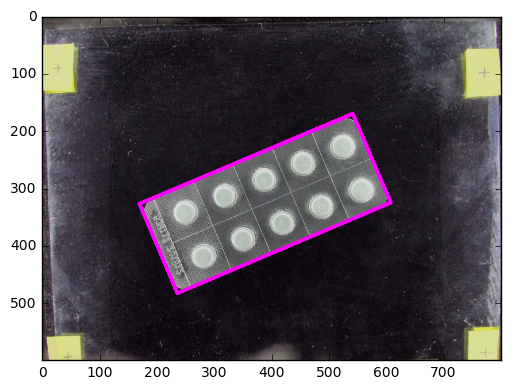

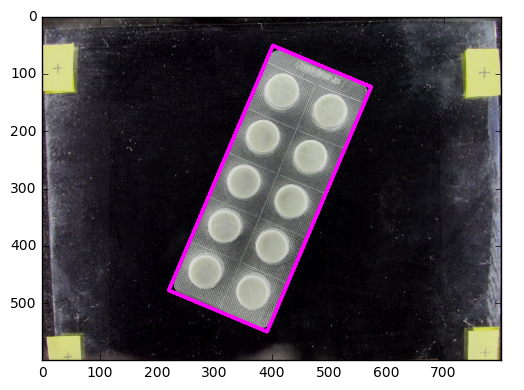

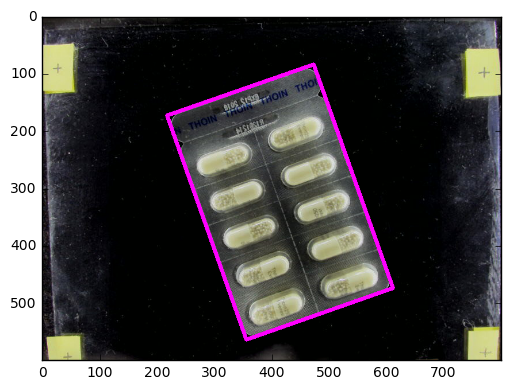

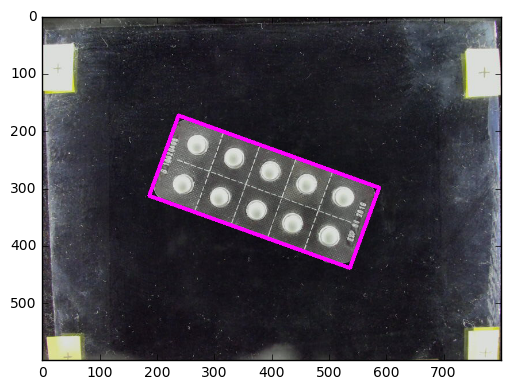

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pics = range(1, 9)

for c in pics:
    path = '/Users/kways/Desktop/Testing/%d.jpg'%c
    image_ori = cv2.imread(path)
    image = cv2.cvtColor(image_ori, cv2.COLOR_BGR2GRAY) # 色域轉換
    image = cv2.medianBlur(image, 11) # 模糊
    image = cv2.Canny(image, 100, 200, apertureSize = 3) # 邊緣檢測
    image, contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 找出最大輪廓面積
    max_area = 0
    index = 0
    for cnt in range(len(contours)):
        area = cv2.contourArea(contours[cnt])
        if area > max_area:
            max_area = area
            index = cnt
    
    # 繪製最小四邊形
    cnt = contours[index]
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(image_ori,[box],0,(255,0,255),5)
    
    # 印出影像
    RGB_img = cv2.cvtColor(image_ori, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_img, 'gray')
    plt.tight_layout()
    plt.show()